In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import cross_val_score
%matplotlib inline

We will use wine quality data for this comparison.

In [2]:
df = pd.read_csv("winequality-red.csv", delimiter=";")

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.isnull().sum()*100/len(df)

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

First of all, let's define X and Y.

In [5]:
X = df.drop(columns="quality")
Y = df["quality"]

### Decision Tree

In [6]:
#import model
from sklearn import tree

#help display visualizations
from IPython.display import Image

#packages for rendering our tree
import pydotplus
from pydotplus import graphviz

In [56]:
#Timing
start=time.time()

#Initialize and train tree
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=2,
    max_features=1)

decision_tree.fit(X, Y)

tree_score = cross_val_score(decision_tree, X, Y, cv=5)

end = time.time()
tree_time = end-start

print("Cross validation score is:" , tree_score.mean(), "\nRun time is:", tree_time)

Cross validation score is: 0.43976281731731354 
Run time is: 0.03827309608459473


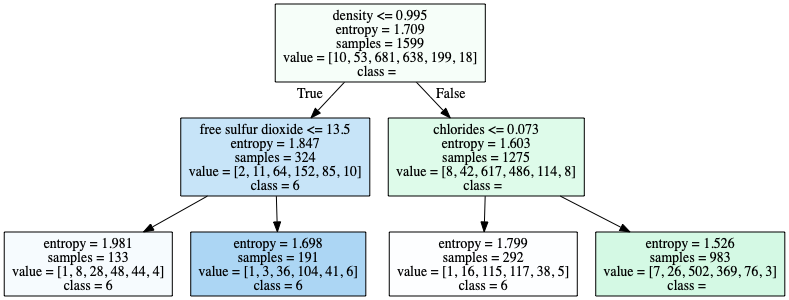

In [57]:
#Render tree
dot_data = tree.export_graphviz(
    decision_tree,
    out_file=None, 
    feature_names=X.columns, 
    class_names=str(Y.unique()),
    filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### Random Forest

In [33]:
#Import model
from sklearn import ensemble

In [55]:
#Timing
start=time.time()

#Initialize and train forest
forest_regression = ensemble.RandomForestClassifier(
    max_depth=2,
    max_features=1)

forest_regression.fit(X, Y)

forest_score=cross_val_score(forest_regression, X, Y, cv=5)

end = time.time()
forest_time = end-start

print("Cross validation score is:", forest_score.mean(), "\nRun time is:", forest_time)

Cross validation score is: 0.5305609883543376 
Run time is: 0.12843585014343262


/Users/yutakatsuyama/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Conclusion

Even though max_depth and max_features of both models is same, random forest has higher accuracy than desicion tree, but it took longer to load than decision tree.